![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


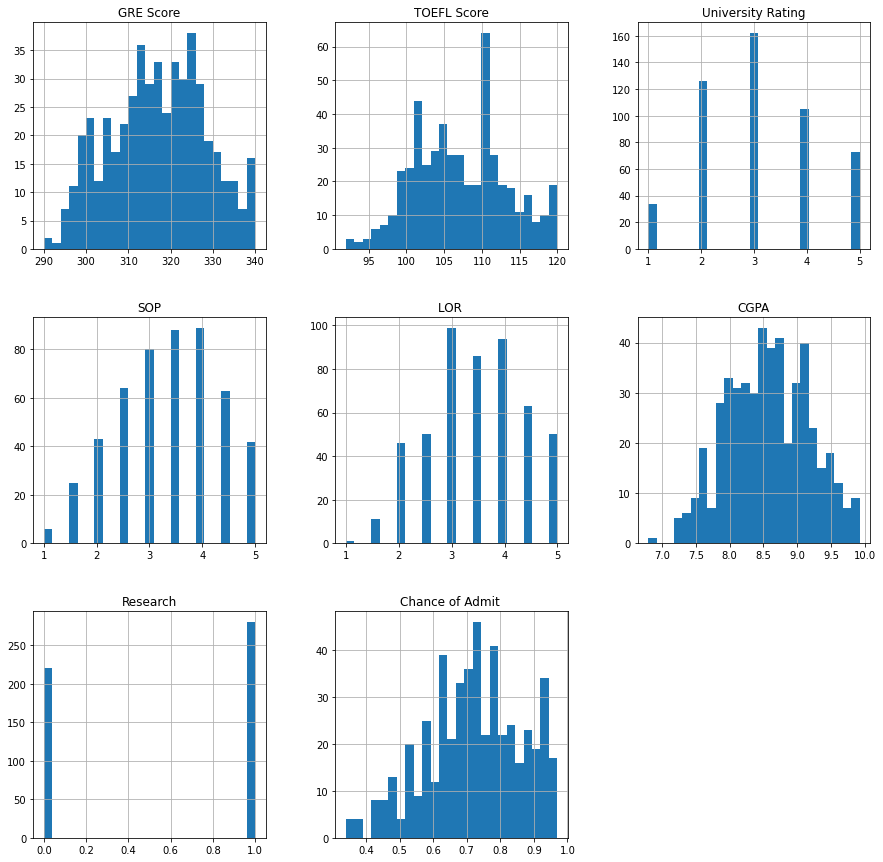

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)
print(xTrain.shape[1:])
print(xTrain.shape)



(7,)
(350, 7)


## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

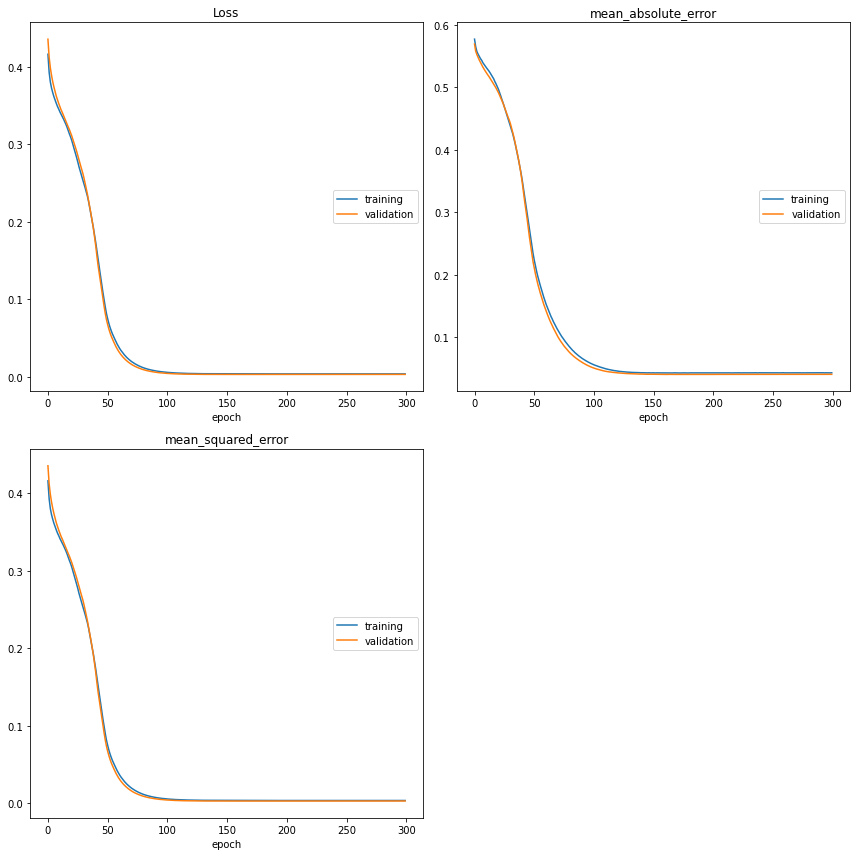

Loss
	training         	 (min:    0.004, max:    0.416, cur:    0.004)
	validation       	 (min:    0.003, max:    0.436, cur:    0.003)
mean_absolute_error
	training         	 (min:    0.043, max:    0.577, cur:    0.043)
	validation       	 (min:    0.041, max:    0.569, cur:    0.041)
mean_squared_error
	training         	 (min:    0.004, max:    0.416, cur:    0.004)
	validation       	 (min:    0.003, max:    0.436, cur:    0.003)
5/5 [==============================] - 0s 3ms/step - loss: 0.0031 - mean_absolute_error: 0.0409 - mean_squared_error: 0.0031
[0.003116701962426305, 0.040917448699474335, 0.003116701962426305]
Elapsed time: 262.6902451515 seconds.
[array([[ 0.0179464 ],
       [ 0.02043347],
       [ 0.00962828],
       [-0.00074205],
       [ 0.01092407],
       [ 0.07056025],
       [ 0.01341976]], dtype=float32), array([0.72636116], dtype=float32)]


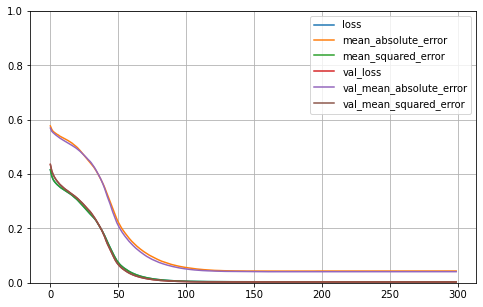

In [8]:
# Celda 1
!pip install tensorflow
!pip install  livelossplot 
from time import time

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from livelossplot import PlotLossesKeras
from keras import backend as K
tf.__version__


scaler= StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest  = scaler.transform(xTest)
K.clear_session()
# EXPERIMENTO 1 : CON 300 EPOCHS
model= keras.models.Sequential([
               keras.layers.Dense(1, input_shape=xTrain.shape[1:], activation = 'relu'),
                               
])

start_time = time()
model.compile(optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()  ,tf.keras.metrics.MeanSquaredError()])
print(model.summary())
history= model.fit(xTrain,yTrain,epochs=300, validation_data=(xTest, yTest), callbacks=[PlotLossesKeras()])
mse_test= model.evaluate(xTest, yTest)
print(mse_test)
elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

print(model.layers[0].get_weights())

import matplotlib.pyplot as plt
 


 

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()






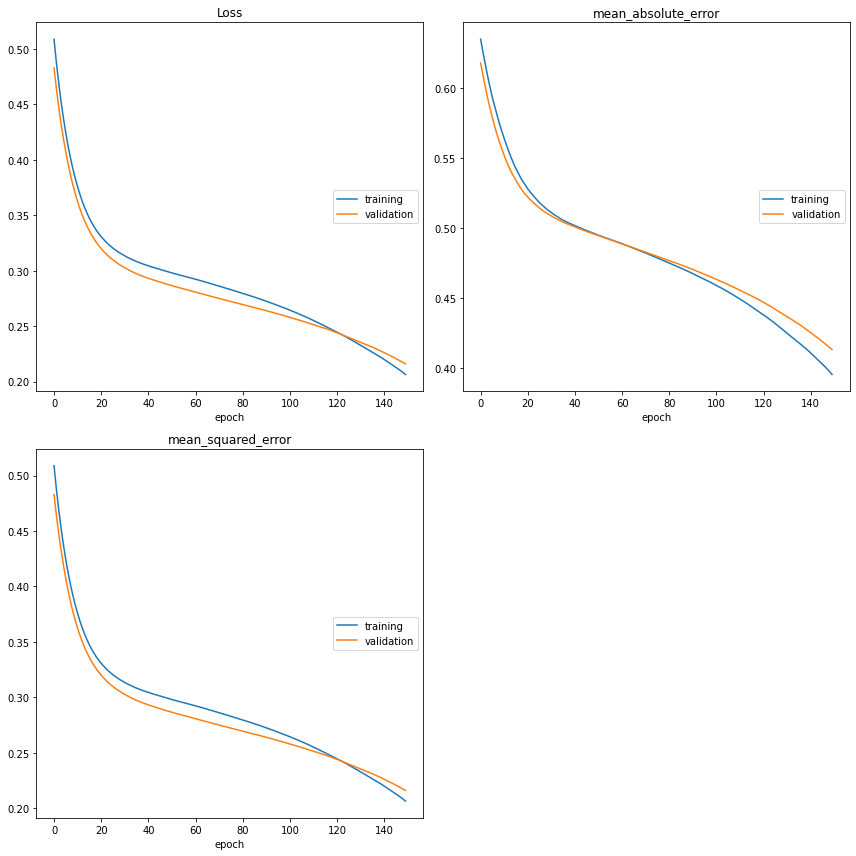

Loss
	training         	 (min:    0.206, max:    0.509, cur:    0.206)
	validation       	 (min:    0.216, max:    0.483, cur:    0.216)
mean_absolute_error
	training         	 (min:    0.396, max:    0.635, cur:    0.396)
	validation       	 (min:    0.413, max:    0.618, cur:    0.413)
mean_squared_error
	training         	 (min:    0.206, max:    0.509, cur:    0.206)
	validation       	 (min:    0.216, max:    0.483, cur:    0.216)
5/5 [==============================] - 0s 3ms/step - loss: 0.2160 - mean_absolute_error: 0.4134 - mean_squared_error: 0.2160
[0.21601341664791107, 0.4133840501308441, 0.21601341664791107]
Elapsed time: 142.5853202343 seconds.
[array([[ 0.20307201],
       [-0.05674465],
       [ 0.0786271 ],
       [ 0.1313957 ],
       [ 0.17228101],
       [ 0.20558862],
       [-0.28779292]], dtype=float32), array([0.28686452], dtype=float32)]


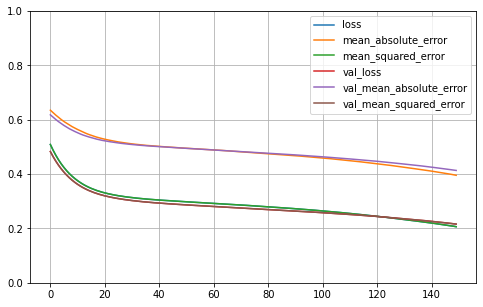

In [15]:
# EXPERIMENTO 2 : CON  150 EPOCHS
K.clear_session()
model= keras.models.Sequential([
               keras.layers.Dense(1, activation = 'relu',input_shape=xTrain.shape[1:]),
                               
])

start_time = time()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()  ,tf.keras.metrics.MeanSquaredError()])
print(model.summary())
history= model.fit(xTrain,yTrain,epochs=150, validation_data=(xTest, yTest), callbacks=[PlotLossesKeras()])
mse_test= model.evaluate(xTest, yTest)
print(mse_test)
elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)
print(model.layers[0].get_weights())

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Análisis
***

## Experimento 1 (Modelo base)
Se realizó un primero experimento con una función de perdida de MSE para un problema de regresión, y una **relu** como funcion de activacion para alejarnos deuna simple regresion lineal; el optimizador de Stochastic Gradient Descent donde el tamanio del batch es de una muestra. Inicialmente, se corrio un experimento de 300 epochs (lo cual significa que recorre 300 veces todo el set de entrenamiento). Esta cantidad de epochs fue escogida con base a la poca cantidad de observaciones. Si la cantidad de observaciones fuese mayor, seguramente se hubiese escogido epoch menores. Al final del entrenamiento, y despues de evaluar contra test (model.evaluate), tenemos los siguientes valores:

 
| Métrica     | Valor |
| ----------- | ----------- |
| MAE      | 0.040917448699474335    |
| MSE   | 0.003116701962426305      |

Los pesos  de la unica capa es:  

| Pesos     | Valor |
| ----------- | ----------- |
| W1      |0.0179464 2    |
| W2   | 0.02043347     |
| W3   | 0.00962828]     |
| W4   | -0.00074205     |
| W5   | 0.01092407     |
| W6   | 0.07056025     |
| W7   | 0.01341976     |

El bias es: 0.72636116

Dado que que las curvas de aprendizaje, convergen finalmente  a un mism punto, es quiere decir que el modelo generaliza bien en ambos dataset, y no hay presencia de sobreajuste. 

Tiempo de Ejecución: 262 seg.

## Experimento 2

A partir de ese primer experimento, notamos que en el epoch=150 el error de validacion converge/estabiliza/satura y no mejora mucho. De aqui, se realiza un segundo experimento con 150 epochs, con los mismos hyperparametros excepto la tasa de aprendizaje (learning_rate= 0.001), hacendo la atualizacion de los pesos un poco mas lento y  obteniendo las siguientes métricas contra test. (model.evaluate)


| Métrica     | Valor |
| ----------- | ----------- |
| MAE      |0.4133840501308441  |
| MSE   |  0.21601341664791107      |

Los pesos de la unica capa es:  

| Pesos     | Valor |
| ----------- | ----------- |
| W1      |0.20307201    |
| W2   | [-0.05674465     |
| W3   | 0.0786271     |
| W4   | 0.1313957    |
| W5   | 0.17228101     |
| W6   |0.20558862     |
| W7   | -0.28779292     |

El bias es: 0.28686452

- En este experimento, empieza a notarse la presencia de overfiftng en el sentido que en el dataset de validacion , el MAE y el MSE empeizan a deteriorarse.

Tiempo de Ejecución: 142 seg.


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

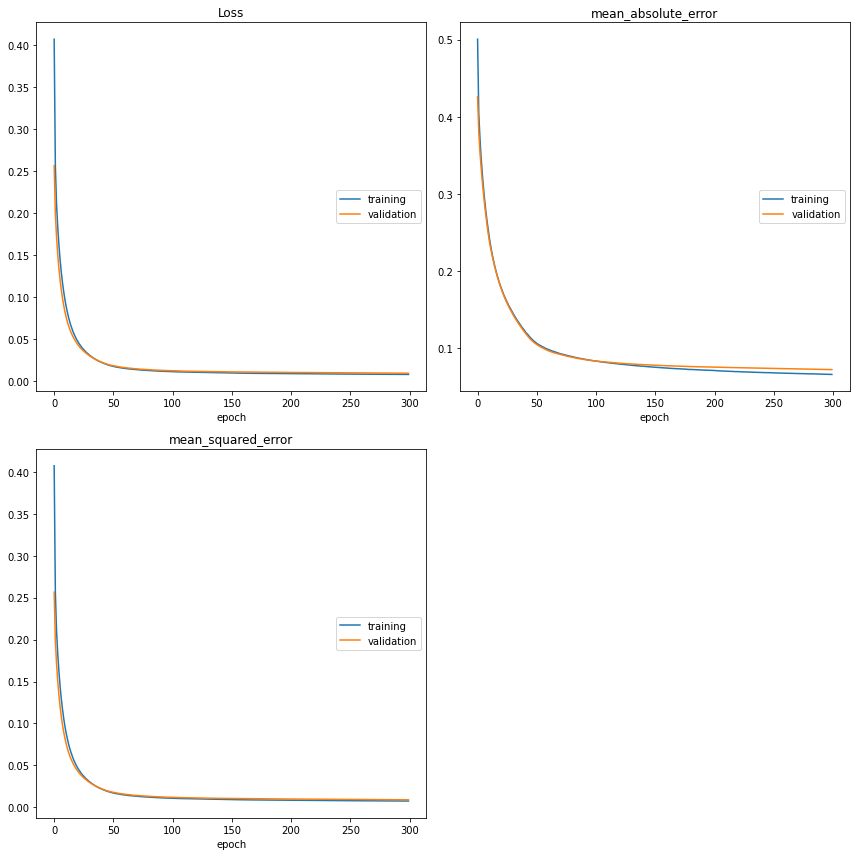

Loss
	training         	 (min:    0.008, max:    0.407, cur:    0.008)
	validation       	 (min:    0.009, max:    0.257, cur:    0.009)
mean_absolute_error
	training         	 (min:    0.066, max:    0.501, cur:    0.066)
	validation       	 (min:    0.072, max:    0.426, cur:    0.072)
mean_squared_error
	training         	 (min:    0.008, max:    0.407, cur:    0.008)
	validation       	 (min:    0.009, max:    0.257, cur:    0.009)
5/5 [==============================] - 0s 3ms/step - loss: 0.0090 - mean_absolute_error: 0.0723 - mean_squared_error: 0.0090
[0.008995854295790195, 0.0723223015666008, 0.008995854295790195]
['loss', 'mean_absolute_error', 'mean_squared_error']
Elapsed time: 184.4009668827 seconds.


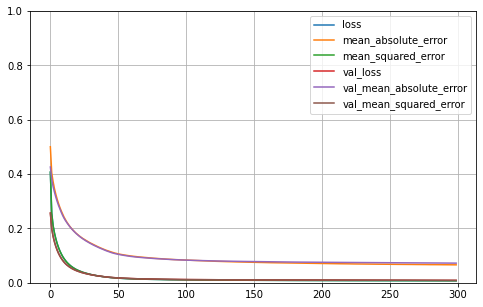

In [ ]:
# Experimento 1 
K.clear_session()
model= keras.models.Sequential([
               keras.layers.Dense(4,activation='relu', input_shape=xTrain.shape[1:]),
               keras.layers.Dense(4,activation='relu'),
               keras.layers.Dense(1) 
                                      
])
start_time = time()
model.compile(optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()  ,tf.keras.metrics.MeanSquaredError()])
print(model.summary())
history= model.fit(xTrain,yTrain,epochs=300, validation_data=(xTest, yTest), callbacks=[PlotLossesKeras()])
mse_test= model.evaluate(xTest, yTest)
print(mse_test)
print(model.metrics_names)
elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

import matplotlib.pyplot as plt
 
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


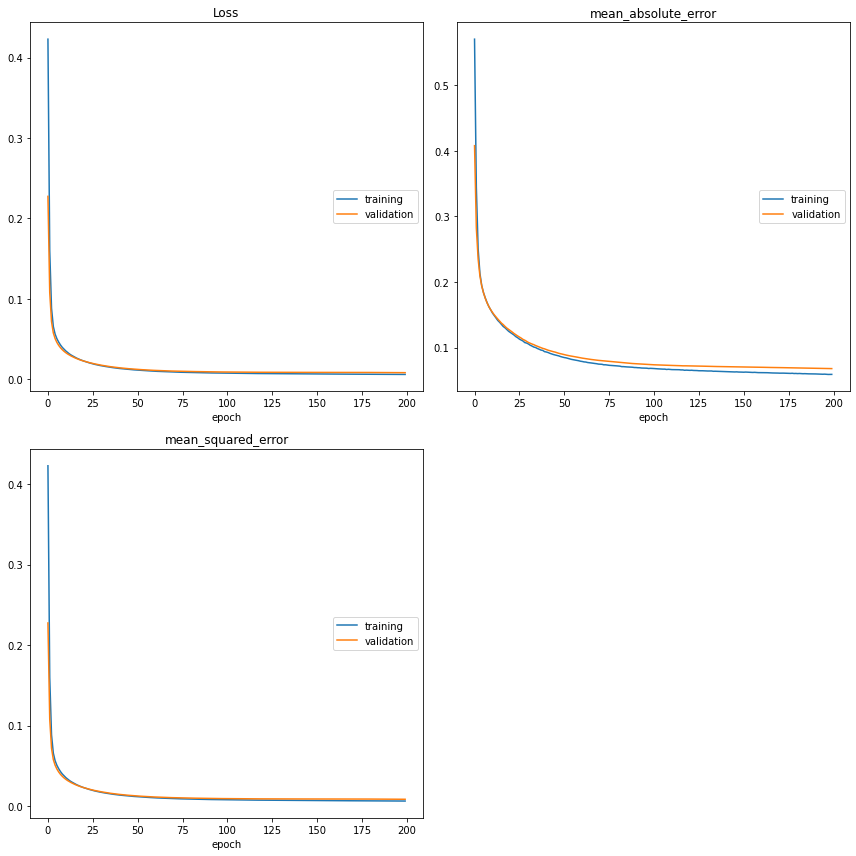

Loss
	training         	 (min:    0.006, max:    0.423, cur:    0.006)
	validation       	 (min:    0.008, max:    0.228, cur:    0.008)
mean_absolute_error
	training         	 (min:    0.059, max:    0.570, cur:    0.059)
	validation       	 (min:    0.068, max:    0.408, cur:    0.068)
mean_squared_error
	training         	 (min:    0.006, max:    0.423, cur:    0.006)
	validation       	 (min:    0.008, max:    0.228, cur:    0.008)
5/5 [==============================] - 0s 2ms/step - loss: 0.0083 - mean_absolute_error: 0.0680 - mean_squared_error: 0.0083
[0.008344247005879879, 0.0679912120103836, 0.008344247005879879]
['loss', 'mean_absolute_error', 'mean_squared_error']
Elapsed time: 142.3385770321 seconds.


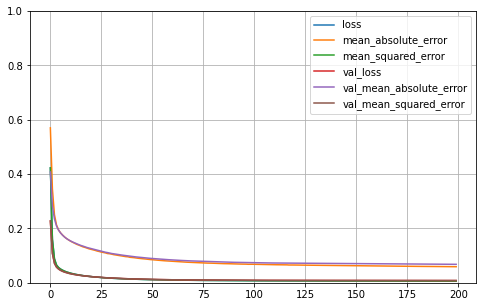

In [ ]:
# Experimento 2
K.clear_session()
model= keras.models.Sequential([
               keras.layers.Dense(4,activation='relu', input_shape=xTrain.shape[1:]),
               keras.layers.Dense(4,activation='relu'),
               keras.layers.Dense(1,activation='relu')                         
])
start_time = time()
model.compile(optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()  ,tf.keras.metrics.MeanSquaredError()])
print(model.summary())
history= model.fit(xTrain,yTrain,epochs=200, validation_data=(xTest, yTest), callbacks=[PlotLossesKeras()])
mse_test= model.evaluate(xTest, yTest)
print(mse_test)
print(model.metrics_names)
elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

import matplotlib.pyplot as plt
 
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


# Análisis
***
## Experimento 1
Se escogieron los siguientes hyperparametros:
- Optimizador: Stochastic Gradient Descent : Tamano Batch = 1
- Función de perdida= MSE
- Dos capas ocultas con 4 neuronas en cada capa. El número de unidades en la capa oculta de 4 (promedio entre Número de entradas versus número de salidas) para evitar sobrejuste.
- Epochs= 300 inicialmente.
Con esta arquitectura se obtiene las siguientes Métricas

| Metrica     | Valor |
| ----------- | ----------- |
| MAE      | 0.061382368206977844    |
| MSE   | 0.006296262610703707     |

Tiempo Ejecución: 174 seg

## Experimento 2
Se escogieron los siguientes hyperparametros:
- Optimizador: Stochastic Gradient Descent : Tamano Batch = 1
- Funcion de perdida= MSE
- Dos capas ocultas con 4 neuronas en cada capa.
- Epochs= 200 
Con esta arquitectura se obtiene las siguientes Métricas

| Metrica     | Valor |
| ----------- | ----------- |
| MAE      | 0.06733918190002441    |
| MSE   | 0.008005263283848763     |

Tiempo Ejecución: 142 seg

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

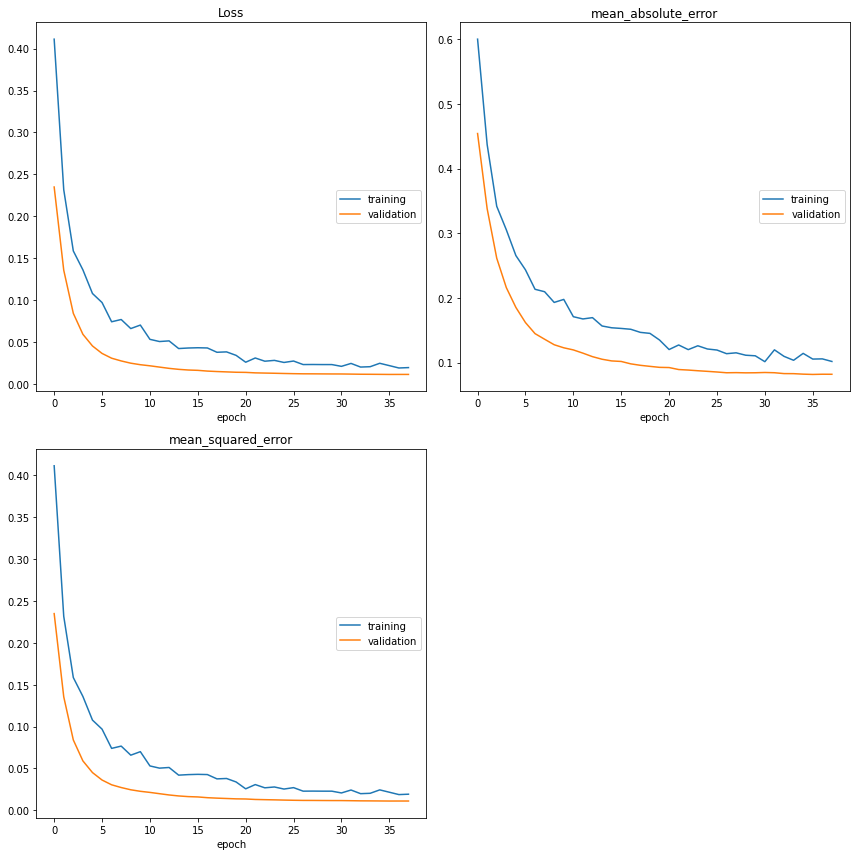

Loss
	training         	 (min:    0.019, max:    0.411, cur:    0.019)
	validation       	 (min:    0.011, max:    0.235, cur:    0.011)
mean_absolute_error
	training         	 (min:    0.101, max:    0.600, cur:    0.102)
	validation       	 (min:    0.082, max:    0.454, cur:    0.082)
mean_squared_error
	training         	 (min:    0.019, max:    0.411, cur:    0.019)
	validation       	 (min:    0.011, max:    0.235, cur:    0.011)
11/11 [==============================] - 1s 81ms/step - loss: 0.0193 - mean_absolute_error: 0.1016 - mean_squared_error: 0.0193 - val_loss: 0.0111 - val_mean_absolute_error: 0.0818 - val_mean_squared_error: 0.0111
Epoch 38: early stopping
5/5 [==============================] - 0s 3ms/step - loss: 0.0111 - mean_absolute_error: 0.0818 - mean_squared_error: 0.0111
[0.011137379333376884, 0.08180148154497147, 0.011137379333376884]
['loss', 'mean_absolute_error', 'mean_squared_error']
Elapsed time: 24.1131033897 seconds.


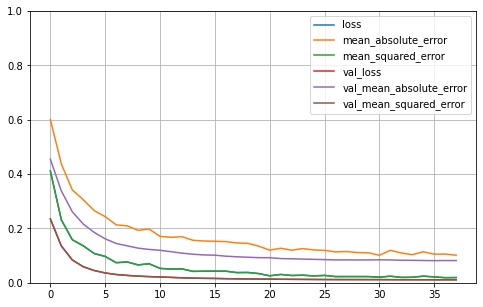

In [ ]:
# Experimento 1
K.clear_session()
from keras.callbacks import EarlyStopping
model= keras.models.Sequential([
               keras.layers.Dense(4,activation='relu', input_shape=xTrain.shape[1:]),
               keras.layers.Dropout(0.2),
               keras.layers.Dense(4,activation='relu'),
               keras.layers.Dropout(0.2),
               keras.layers.Dense(1)                         
])
start_time = time()
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 
model.compile(optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()  ,tf.keras.metrics.MeanSquaredError()])
print(model.summary())
history= model.fit(xTrain,yTrain,epochs=300, validation_data=(xTest, yTest), callbacks=[PlotLossesKeras(), early_stop])
mse_test= model.evaluate(xTest, yTest)
print(mse_test)
print(model.metrics_names)
elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)
import matplotlib.pyplot as plt
 
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

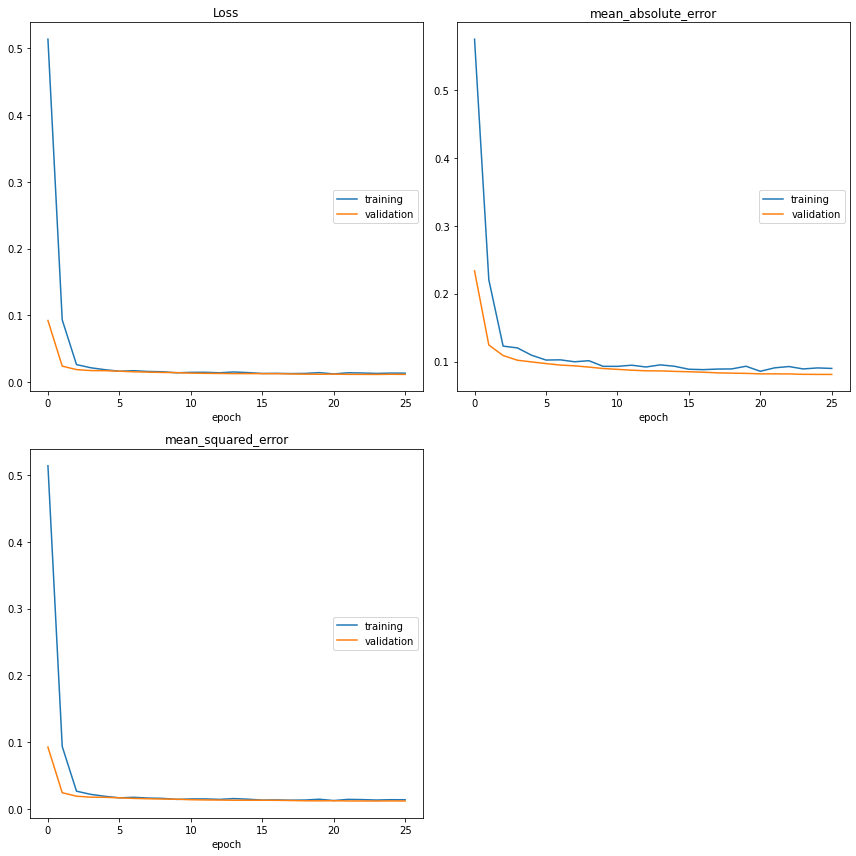

Loss
	training         	 (min:    0.012, max:    0.514, cur:    0.013)
	validation       	 (min:    0.012, max:    0.092, cur:    0.012)
mean_absolute_error
	training         	 (min:    0.086, max:    0.575, cur:    0.090)
	validation       	 (min:    0.081, max:    0.234, cur:    0.081)
mean_squared_error
	training         	 (min:    0.012, max:    0.514, cur:    0.013)
	validation       	 (min:    0.012, max:    0.092, cur:    0.012)
11/11 [==============================] - 1s 75ms/step - loss: 0.0134 - mean_absolute_error: 0.0898 - mean_squared_error: 0.0134 - val_loss: 0.0116 - val_mean_absolute_error: 0.0810 - val_mean_squared_error: 0.0116
Epoch 26: early stopping
5/5 [==============================] - 0s 3ms/step - loss: 0.0116 - mean_absolute_error: 0.0810 - mean_squared_error: 0.0116
[0.011583790183067322, 0.08095744252204895, 0.011583790183067322]
['loss', 'mean_absolute_error', 'mean_squared_error']


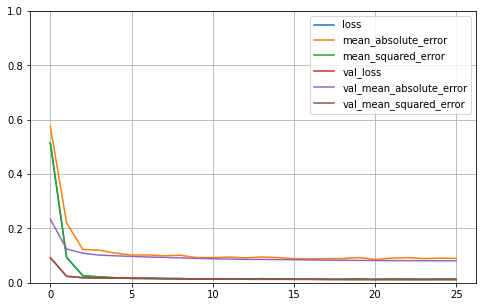

In [ ]:
# Experimento 2
K.clear_session()
from keras.callbacks import EarlyStopping
model= keras.models.Sequential([
               keras.layers.Dense(4,activation='relu', input_shape=xTrain.shape[1:]),
               keras.layers.Dropout(0.2),
               keras.layers.Dense(4,activation='relu'),
               keras.layers.Dropout(0.2),
               keras.layers.Dense(1)                         
])
start_time = time()
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 
model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()  ,tf.keras.metrics.MeanSquaredError()])
print(model.summary())
history= model.fit(xTrain,yTrain,epochs=300, validation_data=(xTest, yTest), callbacks=[PlotLossesKeras(), early_stop])
mse_test= model.evaluate(xTest, yTest)
print(mse_test)
print(model.metrics_names)
elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)
import matplotlib.pyplot as plt
 
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Análisis
***
## Experimento 1
Se escogieron los siguientes hyperparametros:
- Optimizador: Stochastic Gradient Descent : Tamano Batch = 1
- Función de pérdida= MSE
- Dos capas ocultas con 4 neuronas en cada capa.
- Dos capas de regularizacion Dropout con fracion de 20% de unidades para remover en la capa oculta respectiva.
- Epochs= 300 inicialmente.
- La curva de aprendizaje(training error) de training es oscilatoria.  

- El mecanismo de EarlyStoping detiene progreso del algoritmo  en el  epochs=25 , obteniendo las siguientes métricas:


| Métrica     | Valor |
| ----------- | ----------- |
| MAE      |0.08180148154497147    |
| MSE   | 0.011137379333376884     |

Tiempo de Ejecución: 24 seg.

## Experimento 2
Se escogieron los siguientes hyperparametros:
- Optimizador: Stochastic Gradient Descent  con ***momentum=0.9*** para reducir la oscilacion.  Tamano Batch = 1

- La curva de aprendizaje(error) de training es oscilatoria y por ende, este experimento usara SGD con momentum = 0.9 para alisarla 
- Epochs= 300 inicialmente.
- Función de pérdida= MSE
- Dos capas ocultas con 4 neuronas en cada capa.
- Epochs= 300 
-  El mecanismo de EarlyStoping hace parar el progreso del algoritmo en epochs=25, obteniendo las siguientes metricas:
Con esta arquitectura se obtiene las siguientes Metricas

| Métrica     | Valor |
| ----------- | ----------- |
| MAE      | 0.08095744252204895   |
| MSE   |0.011583790183067322     |

Tiempo de Ejecución: 24 seg.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

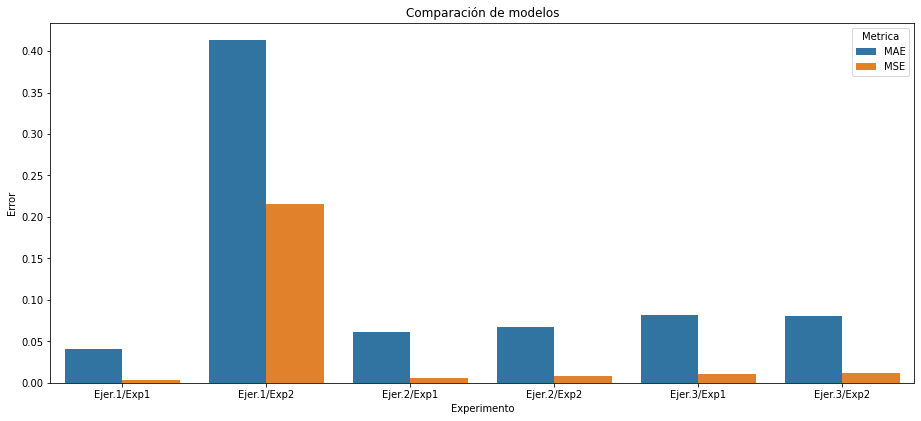

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
df = pd.DataFrame({"Error": [ 0.040917448699474335, 0.003116701962426305,0.4133840501308441, 0.21601341664791107,
                             0.061382368206977844,0.006296262610703707, 0.06733918190002441,0.008005263283848763,
                             0.08180148154497147,0.011137379333376884, 0.08095744252204895,0.011583790183067322],
                  "Metrica": ['MAE','MSE','MAE','MSE','MAE','MSE','MAE','MSE','MAE','MSE','MAE','MSE'],
                  "Experimento":['Ejer.1/Exp1', 'Ejer.1/Exp1','Ejer.1/Exp2', 'Ejer.1/Exp2',
                              'Ejer.2/Exp1', 'Ejer.2/Exp1','Ejer.2/Exp2', 'Ejer.2/Exp2',
                              'Ejer.3/Exp1', 'Ejer.3/Exp1','Ejer.3/Exp2', 'Ejer.3/Exp2'],
                  })

s = sns.barplot(x ="Experimento", y = 'Error', data = df, hue = "Metrica")


# Análisis
***

- El de mejor desempeno tanto en MAE como MSE fue la architectura de 1 capa con 300 epochs.
- El de peor desempeno fue el ejericio 1/Experimento 2 (80 epochs y tasa de aprendzaje = 0.001). Hay presencia de overfifting.

- El segundo de peor desempeno fue el ejericio 3 con capas de regularización y early stopping.